# Linear Classifier in Tensorflow from Scratch

### Starting with some nicely linearly separable synthetic data to work with. 

**Data** : two classes of points in a 2D plane. <br>

We’ll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. <br>
Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane. <br>
We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.<br>


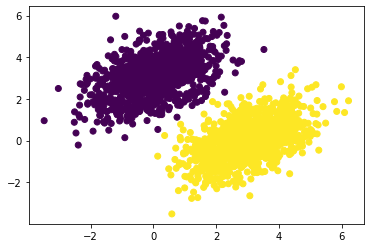

In [7]:
import numpy as np
num_samples_per_class = 1000

# Generate the first class of points: 1000 random 2D points. 
# cov=[[1, 0.5],[0.5, 1]] corresponds to an oval-like point cloud 
# oriented from bottom left to top right.
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
    )
# Generate the other class of points with a different mean and the same covariance matrix.
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
    )

# Stacking the differn tdata into a single array 

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

# generate the corresponding target labels, 
# an array of zeros and ones of shape (2000, 1), 
# where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).

targets = np.vstack(
    (
        np.zeros((num_samples_per_class,1),dtype='float32'),
        np.ones((num_samples_per_class,1),dtype="float32")
    )
    
)

# Plotting the generated data 

import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

### Creating Linear Classifier to separate these two blobs 

A linear classifier is an affine transformation (prediction=W•input+b) trained to minimize the square of the difference between predictions and the targets.

In [9]:
import tensorflow as tf
# creating variables, W and b, initialized with random values and with zeros, respectively.

input_dim = 2  # The inputs will be 2D points.
# The output predictions will be a single score per sample 
# close to 0 if the sample is predicted to be in class 0, 
# and close to 1 if the sample is predicted to be in class 1
output_dim = 1

W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value= tf.zeros(shape=(output_dim,)))





2023-02-25 13:45:32.487361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# Loss Function Mean Squared Loss


def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)
# We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.


In [12]:
# Training Step 

learning_rate = 0.1 

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        # Forward pass inside the GradientTape scope
        predictions = model(inputs)
        loss = square_loss(predictions,targets)
    grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss,[W,b])
    
    # Weight and bias updatation 
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss 


In [13]:
# Training Loop 

for step in range(40):
    loss = training_step(inputs, targets)
    print(F"Loss at step {step}: {loss:.4f}")
    

Loss at step 0: 5.5413
Loss at step 1: 0.9002
Loss at step 2: 0.2592
Loss at step 3: 0.1575
Loss at step 4: 0.1346
Loss at step 5: 0.1237
Loss at step 6: 0.1152
Loss at step 7: 0.1076
Loss at step 8: 0.1007
Loss at step 9: 0.0944
Loss at step 10: 0.0886
Loss at step 11: 0.0832
Loss at step 12: 0.0783
Loss at step 13: 0.0738
Loss at step 14: 0.0697
Loss at step 15: 0.0660
Loss at step 16: 0.0625
Loss at step 17: 0.0593
Loss at step 18: 0.0564
Loss at step 19: 0.0537
Loss at step 20: 0.0513
Loss at step 21: 0.0490
Loss at step 22: 0.0470
Loss at step 23: 0.0451
Loss at step 24: 0.0433
Loss at step 25: 0.0418
Loss at step 26: 0.0403
Loss at step 27: 0.0390
Loss at step 28: 0.0377
Loss at step 29: 0.0366
Loss at step 30: 0.0356
Loss at step 31: 0.0346
Loss at step 32: 0.0338
Loss at step 33: 0.0330
Loss at step 34: 0.0322
Loss at step 35: 0.0316
Loss at step 36: 0.0309
Loss at step 37: 0.0304
Loss at step 38: 0.0299
Loss at step 39: 0.0294


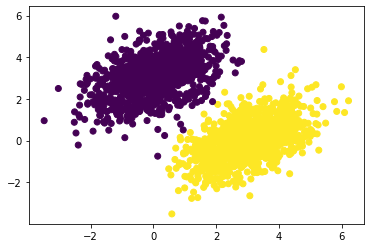

In [15]:
# Plotting the classification model over training data points 

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)

the prediction value for a given point [x, y] is simply prediction == [[w1],[w2]]•[x,y]+b==w1*x+w2*y+b. Thus, class 0 is defined as w1*x+w2 *y+b<0.5, and class 1 is defined as w1*x+w2*y+b>0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane:w1*x+w2*y+b=0.5. Above the line is class 1, and below the line is class 0. You may be used to seeing line equations in the formaty=a*x+b; in the same format, our line becomesy=-w1/w2 *x+(0.5-b)/w2.

In [ ]:

#Generate 100 regularly spaced numbers between –1 and 4, which we will use to plot our line.
